In [31]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
import pandas as pd
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
X_train =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/xtr.mat');
X_test =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/xte.mat');
Y_train =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/ytr.mat');
Y_test =scipy.io.loadmat('/content/drive/MyDrive/NNFL Assignment/Q1_Q2_data/yte.mat');


In [4]:
X_train = [[element for element in upperElement] for upperElement in X_train['xtr']]
X_test = [[element for element in upperElement] for upperElement in X_test['xte']]

Y_train = [[element for element in upperElement] for upperElement in Y_train['ytr']]
Y_test = [[element for element in upperElement] for upperElement in Y_test['yte']]

#X_train = np.array(X_train)
#X_test = np.array(X_test)
#_train = np.array(Y_train)
#Y_test = np.array(Y_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)


In [5]:
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(55, 2)
(10, 2)
(55, 1)
(10, 1)


In [6]:

X_train=X_train.iloc[:,[0]]
m = X_train.shape[0] #no of examples
xmin = np.min(X_train, axis = 0)
xmax = np.max(X_train, axis = 0)
X_train = (X_train- xmin)/(xmax-xmin) #Normalization
print(X_train)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_train = np.append(pp,X_train, axis=1) #Column of one

X_test=X_test.iloc[:,[0]]
m = X_test.shape[0] #no of examples
xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test- xmin)/(xmax-xmin) #Normalization
print(X_test)

pp = np.ones([m, 1]) # vector containg ones as all elements
X_test = np.append(pp,X_test, axis=1) #Column of one

y_train=Y_train.iloc[:,[0]] #output
ymin = np.min(Y_train, axis = 0)
ymax = np.max(Y_train, axis = 0)
Y_train = (Y_train- ymin)/(ymax-ymin)

Y_test=Y_test.iloc[:,[0]] #output
ymin = np.min(Y_test, axis = 0)
ymax = np.max(Y_test, axis = 0)
Y_test = (Y_test- ymin)/(ymax-ymin)

           0
0   0.513228
1   0.513228
2   0.513228
3   0.513228
4   0.513228
5   0.513228
6   0.513228
7   0.513228
8   0.513228
9   0.513228
10  0.513228
11  0.746032
12  0.978836
13  0.253968
14  0.021164
15  0.513228
16  0.746032
17  0.973545
18  0.021164
19  0.507937
20  0.735450
21  0.973545
22  0.269841
23  0.021164
24  0.513228
25  0.730159
26  0.962963
27  0.259259
28  0.021164
29  0.513228
30  0.756614
31  0.989418
32  0.259259
33  0.000000
34  0.513228
35  0.751323
36  0.978836
37  0.269841
38  0.015873
39  0.513228
40  0.513228
41  0.513228
42  0.513228
43  0.513228
44  0.513228
45  0.513228
46  0.767196
47  1.000000
48  0.280423
49  0.026455
50  0.513228
51  0.751323
52  0.984127
53  0.264550
54  0.015873
          0
0  0.521277
1  0.765957
2  1.000000
3  0.292553
4  0.021277
5  0.521277
6  0.760638
7  1.000000
8  0.255319
9  0.000000


In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(55, 2)
(10, 2)
(55, 1)
(10, 1)


In [8]:
def cost_function(X_train,y,w): 
  hypothesis = np.dot(X_train,(w.T)) 
  #hypothesis = X_train @ w.T
  J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) 
  return J

In [9]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) 

  for i in range(iters):
    #cost_history[i] = cost_function(X,y,w)
    hypothesis = np.dot(X_train , (w.T))
    w = w - (alpha/len(y)) * (np.dot((X.T) , (hypothesis - y))).T
    cost_history[i] = cost_function(X,y,w)
  return (w,cost_history)

In [10]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * ((ind_x.T.dot(ind_x.dot(w.T) - ind_y))).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [11]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * ((ind_x.T.dot(ind_x.dot(w.T) - ind_y))).T
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [12]:
w= np.zeros((1 ,  (X_train.shape[1])))
print(w.shape)


(1, 2)


In [13]:
#BGD
alpha=0.5
iters=100 
lamb=0.1
batch_w,J_his = batch_gradient_descent(X_train,Y_train,w,alpha,iters,lamb)



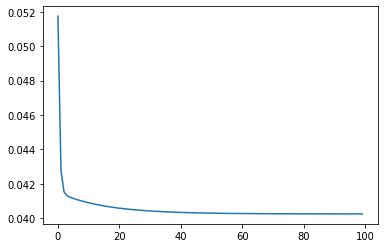

[[ 0.40212606 -0.00334098]]


In [14]:
plt.plot(range(iters),J_his)
plt.show()
print (batch_w)

In [15]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [16]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [30]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)


[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [18]:
#MBGD
alpha=0.05
iters=1200
batch_size=50
mini_batch_w,J_mini_batch = MB_gradient_descent(X_train,Y_train,w,alpha,iters, batch_size)

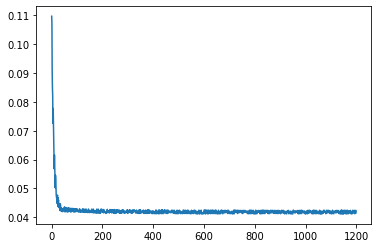

[[0.38727641 0.01254591]]


In [19]:
plt.plot(range(iters),J_mini_batch)
plt.show()
print(mini_batch_w)

In [20]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [21]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [22]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [23]:
#SGD
n_epochs=3000
alpha=0.1
w_n,J_sgd = stochastic_gradient_descent(X_train,Y_train,w, alpha, n_epochs)


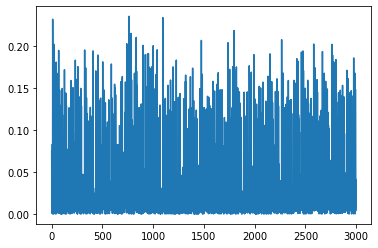

[[ 0.43051884 -0.05483968]]


In [24]:
plt.plot(range(n_epochs),J_sgd)
plt.show()
print(w_n)

In [25]:
#Mean square error
hypothesis = np.dot(X_test , (w.T))
#print(hypothesis.shape)
MSE = np.square(np.subtract(Y_test,hypothesis)).mean()
print (MSE)

0    0.5
dtype: float64


In [26]:
#Mean absolute error

hypothesis = np.dot(X_test , (w.T))  
mae = np.absolute(np.subtract(Y_test, hypothesis)).mean()
print(mae)

0    0.5
dtype: float64


In [27]:
#Co relation co efficient
hypothesis = np.dot(X_test , (w.T))
my_rho = np.corrcoef( Y_test)
print(my_rho)

[[nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
